# **VDV-TOURIST CHÀO MỪNG QUÝ VỊ & CÁC BẠN ĐẾN VỚI TOUR DU LỊCH VÒNG QUANH THẾ GIỚI QUA LĂNG KÍNH KHỦNG BỐ**

---


Trong tour du lịch 8 phút ngày hôm nay, chúng tôi sẽ giới thiệu cho các bạn về sự thay đổi của tình trạng khủng bố trên thế giới kể từ năm 1970 tới năm 2019. Hãy thắt dây an toàn & chúng ta cùng khởi hành nhé!


**Khủng bố là gì?**
> Theo từ điển Oxford, "khủng bố" có nghĩa là "Việc sử dụng bất hợp pháp bạo lực và đe dọa, đặc biệt là đối với dân thường, để theo đuổi các mục đích chính trị."
Tuy nhiên, định nghĩa này khá chủ quan, vì vậy chúng ta hãy cùng tìm hiểu định nghĩa & các tiêu chí để xếp loại 1 sự việc là khủng bố từ dataset mà chúng ta sẽ sử dụng.

**Giới thiệu về dataset: GLOBAL TERRORISM DATABASE (GTD)**
> Cơ sở dữ liệu khủng bố toàn cầu (GTD) - thuộc sở hữu của Hiệp hội Quốc gia về Nghiên cứu Khủng bố và Ứng phó với Chủ nghĩa Khủng bố - Đại học Maryland (Mỹ) - là cơ sở dữ liệu mã nguồn mở bao gồm thông tin về các cuộc tấn công khủng bố tại Mỹ và các quốc gia trên khắp thế giới từ năm 1970 đến năm 2019, và hiện bao gồm hơn 200.000 trường hợp khủng bố được ghi nhận.

**Định nghĩa về khủng bố & các tiêu chí để ghi nhận sự việc khủng bố theo GTD**
> Theo GTD, một cuộc tấn công khủng bố được định nghĩa là hành vi đe dọa hoặc thực tế sử dụng vũ lực và bạo lực bất hợp pháp của một tổ chức phi nhà nước để đạt được mục tiêu chính trị, kinh tế, tôn giáo hoặc xã hội thông qua sự sợ hãi, ép buộc hoặc đe dọa.
Các **tiêu chí bắt buộc phải có** để xếp loại một sự việc là hành động khủng bố bao gồm:
*   **Sự việc xảy ra phải có chủ đích** - là kết quả của sự tính toán có ý thức từ phía đối tượng thực hiện sự việc (thủ phạm).
*   **Sự việc phải có mức độ bạo lực hoặc đe dọa bạo lực tức thời** - bao gồm bạo lực/thiệt hại về tài sản, cũng như bạo lực đối với con người.
*   **Thủ phạm của các sự việc phải là các tác nhân dưới-quốc gia** - không phải hành động của các chính phủ, nhà nước được công nhận.

>> Ngoài ra, **ít nhất 2 trong 3 tiêu chí dưới đây cũng cần thiết phải đồng thời xuất hiện** để một sự việc được ghi nhận là khủng bố trong GTD:
*   *Tiêu chí 1*: Hành động phải nhằm đạt được mục tiêu chính trị, kinh tế, tôn giáo hoặc xã hội.
*   *Tiêu chí 2*: Phải có bằng chứng về ý định ép buộc, đe dọa hoặc truyền đạt một số thông điệp khác đến một lượng lớn khán giả (hoặc khán giả) hơn là những nạn nhân trực tiếp.
*   *Tiêu chí 3*: Hành động phải nằm ngoài bối cảnh của các hoạt động chiến tranh hợp pháp.

Source: http://start.umd.edu/gtd


---






# **LINK GDS**
https://datastudio.google.com/reporting/d998a577-206b-4627-ab0e-488982746dbf
---


# **Import neccessary libraries & our dataset**


---



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df1 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Group 3 - Week 3+4 - Vy Vỹ Đông/gtd_update_2019.csv", encoding="iso-8859-1", engine = "python", index_col=0)

**Check our imported dataset**


---



In [ ]:
df1.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
df1.shape

(201183, 135)

In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201183 entries, 0 to 201182
Columns: 135 entries, eventid to related
dtypes: float64(53), int64(24), object(58)
memory usage: 208.7+ MB


# **SOUTHEAST ASIA INSIGHTS**

In [ ]:
df = df1.copy()[["iyear","imonth","iday","region_txt","country_txt","provstate",
"success","suicide","attacktype1_txt", "targtype1_txt","natlty1_txt",
"gname","motive","claimed","claimmode_txt","weaptype1_txt",
"multiple",
"nkill",
"nkillus",
"nwound",
"nwoundus",
"nkillter",
"nwoundte",
"ishostkid",
"nhostkid", "nhostkidus","ransom","ransomamt","ransomamtus","ransompaid","ransompaidus","hostkidoutcome_txt","nreleased"]]

In [ ]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','provstate':'Provstate',
                   'attacktype1_txt':'AttackType','targtype1_txt':'TargetType','natlty1_txt':'TargetNatlty',
                   'gname':'Group',"claimed":"Claimed","claimmode_txt":"ClaimMode",'weaptype1_txt':'WeaponType','nkill':'Kill','nwound':'Wound','motive':'Motive',
                   "nhostkid":"nvictims", "nhostkidus":"nvictimsus","hostkidoutcome_txt":"hostkidoutcome"},inplace=True)

In [ ]:
df["Region"].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [ ]:
df_sea = df[df["Region"]=="Southeast Asia"]

In [ ]:
df_sea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14079 entries, 2 to 201175
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            14079 non-null  int64  
 1   Month           14079 non-null  int64  
 2   Day             14079 non-null  int64  
 3   Region          14079 non-null  object 
 4   Country         14079 non-null  object 
 5   Provstate       14079 non-null  object 
 6   success         14079 non-null  int64  
 7   suicide         14079 non-null  int64  
 8   AttackType      14079 non-null  object 
 9   TargetType      14079 non-null  object 
 10  TargetNatlty    14056 non-null  object 
 11  Group           14079 non-null  object 
 12  Motive          5549 non-null   object 
 13  Claimed         11303 non-null  float64
 14  ClaimMode       1080 non-null   object 
 15  WeaponType      14079 non-null  object 
 16  multiple        14079 non-null  int64  
 17  Kill            13748 non-null

In [ ]:
df_sea.head(3)

,Year,Month,Day,Region,Country,Provstate,success,suicide,AttackType,TargetType,TargetNatlty,Group,Motive,Claimed,ClaimMode,WeaponType,multiple,Kill,nkillus,Wound,nwoundus,nkillter,nwoundte,ishostkid,nvictims,nvictimsus,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased
2,1970,1,0,Southeast Asia,Philippines,Tarlac,1,0,Assassination,Journalists & Media,United States,Unknown,NaN,NaN,NaN,Unknown,0,1.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
26,1970,1,21,Southeast Asia,Philippines,Metropolitan Manila,1,0,Bombing/Explosion,Government (Diplomatic),United States,Unknown,NaN,NaN,NaN,Explosives,0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
39,1970,1,31,Southeast Asia,Philippines,Tarlac,0,0,Unknown,Military,United States,New People's Army (NPA),NaN,NaN,NaN,Unknown,0,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Fill NA cho các cột thông tin thể hiện thương vong
df_sea = df_sea.fillna({'Kill':0.0, 'nkillus':0.0, 'Wound':0.0, 'nwoundus':0.0, "nkillter":0.0, "nwoundte":0.0})

# Define function để fillna cho cột Kill & Wound
def fill_nkill_us_notempty(row):
    if row['nkillus'] >  row['Kill']:
        row['Kill'] = row['nkillus']
    elif row['nwoundus'] > row['Wound']:
        row['Wound'] = row['nwoundus']
    elif row["nkillter"] > row["Kill"]:
        row["Kill"] = row["nkillter"]
    elif row["nwoundte"] > row["Wound"]:
        row["Wound"] = row["nwoundte"]
    return row

#@title Function to clean kill/wound columns
# Áp dụng function
df_sea[['Kill', 'nkillus', 'Wound', 'nwoundus','nkillter','nwoundte']] = df_sea[['Kill', 'nkillus', 'Wound', 'nwoundus','nkillter','nwoundte']].apply(fill_nkill_us_notempty,axis=1)

# Drop 2 cột nkillus & nwoundus không còn dùng & thêm cột tổng thương vong
df_sea.drop(["nkillus","nwoundus"],axis=1, inplace=True)
df_sea["Casualities"] = df_sea["Kill"]+df_sea["Wound"]
df_sea.head()

,Year,Month,Day,Region,Country,Provstate,success,suicide,AttackType,TargetType,TargetNatlty,Group,Motive,Claimed,ClaimMode,WeaponType,multiple,Kill,Wound,nkillter,nwoundte,ishostkid,nvictims,nvictimsus,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,Casualities
2,1970,1,0,Southeast Asia,Philippines,Tarlac,1,0,Assassination,Journalists & Media,United States,Unknown,NaN,NaN,NaN,Unknown,0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
26,1970,1,21,Southeast Asia,Philippines,Metropolitan Manila,1,0,Bombing/Explosion,Government (Diplomatic),United States,Unknown,NaN,NaN,NaN,Explosives,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
39,1970,1,31,Southeast Asia,Philippines,Tarlac,0,0,Unknown,Military,United States,New People's Army (NPA),NaN,NaN,NaN,Unknown,0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
96,1970,3,0,Southeast Asia,Philippines,Metropolitian Manila,1,0,Bombing/Explosion,Government (Diplomatic),United States,Unknown,NaN,NaN,NaN,Explosives,0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
150,1970,3,24,Southeast Asia,Philippines,Pampanga,1,0,Unknown,Military,United States,Unknown,NaN,NaN,NaN,Unknown,0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
df_sea["Country"].unique()

array(['Philippines', 'Cambodia', 'Vietnam', 'Brunei', 'Thailand',
       'Myanmar', 'Malaysia', 'Singapore', 'Indonesia', 'Laos',
       'East Timor'], dtype=object)

In [ ]:
df_sea["Country"]=df_sea["Country"].str.replace("South Vietnam","Vietnam")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_vietnam = df_sea[df_sea["Country"]=="Vietnam"]

In [ ]:
df_vietnam.shape

(14, 33)

In [ ]:
df_vietnam = df_vietnam[["Year","Provstate","AttackType","Kill"]].reset_index(drop=True)

In [ ]:
df_sea_new = df_sea[["Year","Month","Region","Country","Provstate","AttackType",
                     "Group","Kill","Wound","Casualities"]]

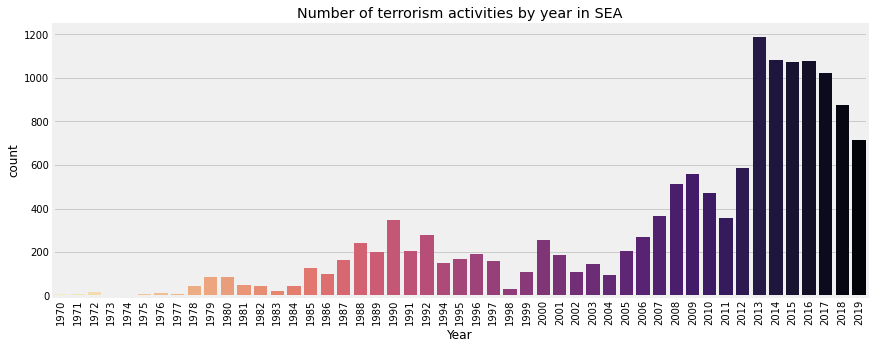

In [ ]:
# Graph theo năm
plt.subplots(figsize=(13,5))
sns.countplot(data=df_sea,x="Year",palette='magma_r')
plt.xticks(rotation=90)
plt.title('Number of terrorism activities by year in SEA')
plt.show()

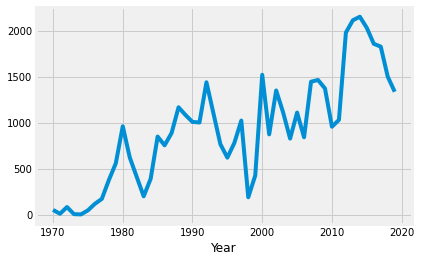

In [ ]:
df_sea.groupby("Year")["Casualities"].sum().plot(kind="line")

In [ ]:
df_sea["Country"].value_counts()


Philippines    7976
Thailand       4162
Indonesia       831
Myanmar         678
Cambodia        260
Malaysia        108
Laos             27
Vietnam          14
East Timor       10
Singapore         7
Brunei            6
Name: Country, dtype: int64

In [ ]:
# For almost all attacking type, the Philippines is top 1.
# Xuất ra bảng!!!
table_2 = pd.pivot_table(df_sea, index=["Country"],columns=["AttackType"],values=["success"],aggfunc=len, fill_value=0)
table_2

success                ...                        
AttackType  Armed Assault Assassination  ... Unarmed Assault Unknown
Country                                  ...                        
Brunei                  0             6  ...               0       0
Cambodia               62            26  ...               2      21
East Timor              3             1  ...               0       0
Indonesia             283            38  ...               9      36
Laos                   10             0  ...               0       2
Malaysia               14             2  ...               1       2
Myanmar               130            22  ...               0      69
Philippines          2530          1393  ...               4     325
Singapore               0             1  ...               0       1
Thailand             1523           200  ...               8      25
Vietnam                 1             1  ...               4       1

[11 rows x 9 columns]

In [ ]:
table_2.reset_index(inplace=True)

In [ ]:
# Change columns name HOSTAGE
df_sea["AttackType"].replace(to_replace="Hostage Taking (Kidnapping)",value="Hostage",inplace=True)
# df_sea["AttackType"].replace(to_replace="Hostage Taking (Barricade Incident)",value="Hostage",inplace=True)

In [ ]:
df_sea["AttackType"].value_counts()


Bombing/Explosion                 5297
Armed Assault                     4556
Assassination                     1690
Facility/Infrastructure Attack    1044
Hostage                            917
Unknown                            482
Hijacking                           65
Unarmed Assault                     28
Name: AttackType, dtype: int64

In [ ]:
df_sea.columns


Index(['Year', 'Month', 'Day', 'Region', 'Country', 'Provstate', 'success',
       'suicide', 'AttackType', 'TargetType', 'TargetNatlty', 'Group',
       'Motive', 'Claimed', 'ClaimMode', 'WeaponType', 'multiple', 'Kill',
       'Wound', 'nkillter', 'nwoundte', 'ishostkid', 'nvictims', 'nvictimsus',
       'ransom', 'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus',
       'hostkidoutcome', 'nreleased', 'Casualities'],
      dtype='object')

In [ ]:
df_sea["ransom"].replace(-9,0,inplace=True)
# df_sea["ransomamt"].replace(-99,0,inplace=True)
# df_sea["ransompaid"].replace(-99,0,inplace=True)
# df_sea["nreleased"].replace(-99,0,inplace=True)

In [ ]:
df_sea["ransom"].value_counts()
# df_sea["ransomamt"].value_counts()
# df_sea["ransompaid"].value_counts()
# df_sea["nreleased"].value_counts()

In [ ]:
# Drop unnecessary columns
df_sea.drop(columns=["nvictimsus","ransomamtus","ransompaidus"],inplace=True)

In [ ]:
new1 = df_sea[df_sea["ransom"]==1][["Country"]].value_counts().reset_index()
new1.columns=["Country","Incidents"]
new1

,Country,Incidents
0,Philippines,140
1,Malaysia,14
2,Indonesia,7
3,Myanmar,4
4,Thailand,3
5,Cambodia,3
6,Laos,1


In [ ]:
new2 = df_sea.groupby("Country")["ransompaid"].sum().sort_values(ascending=False).reset_index()
table_3 = pd.merge(new1,new2, how="left", on = "Country")
table_3

,Country,Incidents,ransompaid
0,Philippines,140,4641008.69
1,Malaysia,14,1858427.70
2,Indonesia,7,0.00
3,Myanmar,4,1846.55
4,Thailand,3,0.00
5,Cambodia,3,352000.00
6,Laos,1,0.00


In [ ]:
new3 = df_sea[df_sea["ransom"]==1][["AttackType"]].value_counts().reset_index()
new3

,AttackType,0
0,Hostage,160
1,Hijacking,8
2,Unknown,1
3,Facility/Infrastructure Attack,1
4,Bombing/Explosion,1
5,Assassination,1


In [ ]:
new4 = df_sea[df_sea["ransom"]==1].groupby(["AttackType"])["ransompaid"].sum().reset_index()
new4

,AttackType,ransompaid
0,Assassination,0.00
1,Bombing/Explosion,0.00
2,Facility/Infrastructure Attack,0.00
3,Hijacking,1060435.50
4,Hostage,5792847.44
5,Unknown,0.00


In [ ]:
table_4 = pd.merge(new3,new4, how="inner", on = "AttackType")
table_4

,AttackType,0,ransompaid
0,Hostage,160,5792847.44
1,Hijacking,8,1060435.50
2,Unknown,1,0.00
3,Facility/Infrastructure Attack,1,0.00
4,Bombing/Explosion,1,0.00
5,Assassination,1,0.00


In [ ]:
df_sea[(df_sea["Country"]=="Philippines")&(df_sea["ransompaid"]>0)]["Group"].value_counts()

Abu Sayyaf Group (ASG)                   22
Unknown                                  11
New People's Army (NPA)                   5
Moro National Liberation Front (MNLF)     2
Name: Group, dtype: int64

In [ ]:
df_sea[(df_sea["Country"]=="Malaysia")&(df_sea["ransompaid"]>0)]["Group"].value_counts()

Abu Sayyaf Group (ASG)    5
Name: Group, dtype: int64

In [ ]:
table_5 = df_sea[df_sea["ransompaid"]>0].groupby(["Country","Group"])["success"].size().reset_index()
table_5

,Country,Group,success
0,Cambodia,Khmer Rouge,1
1,Cambodia,Unknown,2
2,Malaysia,Abu Sayyaf Group (ASG),5
3,Myanmar,Ta'ang National Liberation Army (TNLA),1
4,Philippines,Abu Sayyaf Group (ASG),22
5,Philippines,Moro National Liberation Front (MNLF),2
6,Philippines,New People's Army (NPA),5
7,Philippines,Unknown,11


In [ ]:
t1 = df_sea[(df_sea["Country"]=="Philippines")|(df_sea["Country"]=="Malaysia")].groupby("Group")["ransompaid"].sum().sort_values(ascending=False).reset_index()
t2 = df_sea[(df_sea["Country"]=="Philippines")|(df_sea["Country"]=="Malaysia")].groupby("Group")["ransomamt"].sum().sort_values(ascending=False).reset_index()

pd.options.display.float_format = "{:,.3f}".format
ransom_philippines = pd.merge(t2,t1,how="inner",on="Group")
ransom_philippines["ransom_rate"] = ransom_philippines["ransompaid"]/ransom_philippines["ransomamt"]
ransom_philippines.sort_values("ransompaid",ascending=False).reset_index(drop=True)

,Group,ransomamt,ransompaid,ransom_rate
0,Abu Sayyaf Group (ASG),"133,157,145.210","4,047,118.590",0.030
1,Unknown,"7,876,275.250","1,347,273.650",0.171
2,New People's Army (NPA),"80,522,390.650","1,064,744.150",0.013
3,Moro National Liberation Front (MNLF),"1,532,300.000","40,300.000",0.026
4,Partido Marxista-Leninista ng Pilipinas (PMLP),0.000,0.000,nan
...,...,...,...,...
81,Al-Khobar,0.000,0.000,nan
82,Ansar Al-Khilafa (Philippines),0.000,0.000,nan
83,Jihadi-inspired extremists,0.000,0.000,nan
84,East Asia Division of the Islamic State,0.000,0.000,nan


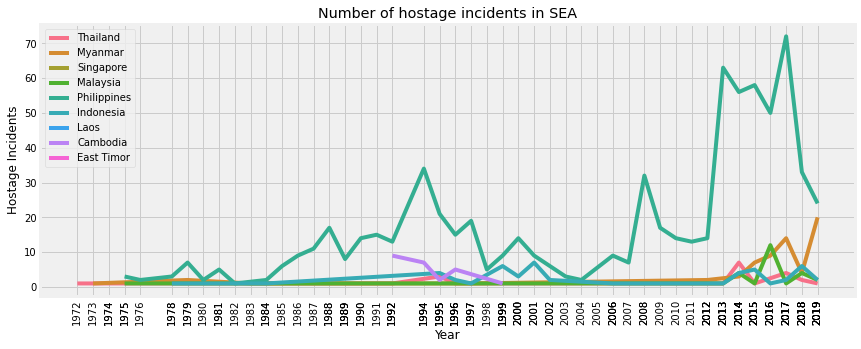

In [ ]:
plot1 = df_sea[df_sea["AttackType"]=="Hostage"].groupby(["Year","Country"])["success"].size().reset_index()
plot1.columns=["Year","Country","Hostage Incidents"]
plt.figure(figsize=(13,5))
sns.lineplot(data=plot1,
             x="Year", y="Hostage Incidents", hue="Country")
plt.title("Number of hostage incidents in SEA")
plt.xticks(ticks=plot1["Year"],rotation=90)
plt.legend()
plt.show()

In [ ]:
hostage_group = df_sea[df_sea["AttackType"]=="Hostage"]["Group"].value_counts().reset_index()
hostage_group.columns=["Group","Incidents"]

In [ ]:
ransom_philippines = pd.merge(ransom_philippines,hostage_group,how="inner",on="Group")
ransom_philippines

,Group,ransomamt,ransompaid,ransom_rate,Incidents
0,Abu Sayyaf Group (ASG),"133,157,145.210","4,047,118.590",0.030,202
1,New People's Army (NPA),"80,522,390.650","1,064,744.150",0.013,304
2,Moro Islamic Liberation Front (MILF),"10,748,623.000",0.000,0.000,37
3,Unknown,"7,876,275.250","1,347,273.650",0.171,162
4,Former Muslim Guerrillas,"1,800,000.000",0.000,0.000,1
5,Muslim extremists,"1,800,000.000",0.000,0.000,3
6,Moro National Liberation Front (MNLF),"1,532,300.000","40,300.000",0.026,32
7,Muslim Rebels,"554,000.000",0.000,0.000,4
8,Bangsamoro Islamic Freedom Movement (BIFM),"224,719.000",0.000,0.000,15
9,Muslims,"100,000.000",0.000,0.000,5


In [ ]:
# ABU SAYYAF TABLE
asg_df = df_sea[df_sea["Group"]=="Abu Sayyaf Group (ASG)"]

In [ ]:
asg_df.shape


(579, 29)

In [ ]:
# Drop unneccesary columns
asg_df.drop(columns=["suicide","Group","Claimed","ClaimMode","multiple"],inplace=True)
asg_df.columns

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['Year', 'Month', 'Day', 'Region', 'Country', 'Provstate', 'success',
       'AttackType', 'TargetType', 'TargetNatlty', 'Motive', 'WeaponType',
       'Kill', 'Wound', 'nkillter', 'nwoundte', 'ishostkid', 'nvictims',
       'ransom', 'ransomamt', 'ransompaid', 'hostkidoutcome', 'nreleased',
       'Casualities'],
      dtype='object')

In [ ]:
asg_df.shape

(579, 24)

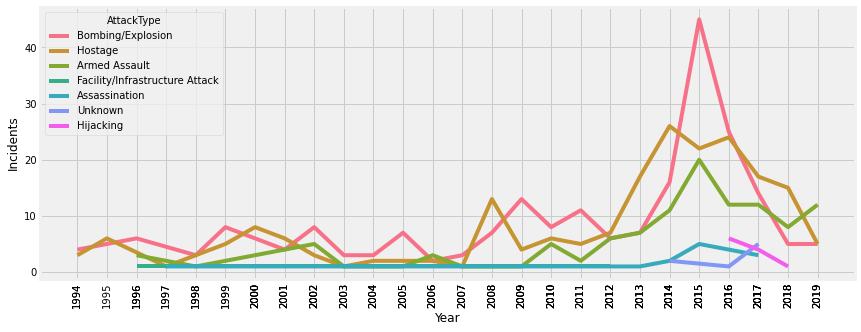

In [ ]:
plot2 = asg_df.groupby(["Year","AttackType"])["success"].count().reset_index()
plot2.columns=["Year","AttackType","Incidents"]

plt.figure(figsize=(13,5))
sns.lineplot(data=plot2, x="Year",y="Incidents",hue="AttackType")
plt.xticks(ticks=plot2["Year"],rotation=90)
plt.show()

In [ ]:
# pd.options.display.float_format = "{:,.2f}".format
plot3 = asg_df.groupby("Year")[["Kill","Casualities"]].sum().reset_index()
plot3.head()

,Year,Kill,Casualities
0,1994,37.000,103.000
1,1995,117.000,118.000
2,1996,10.000,39.000
3,1997,2.000,2.000
4,1998,4.000,32.000


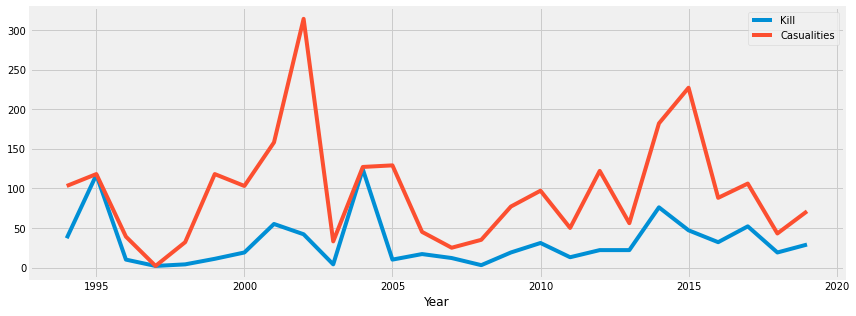

In [ ]:
plot3.plot(figsize=(13,5),x="Year")

In [ ]:
# Vụ năm 1995
asg_df_1995 = asg_df[asg_df["Year"]==1995]
asg_df_1995[asg_df_1995["Kill"]==asg_df_1995["Kill"].max()]

,Year,Month,Day,Region,Country,Provstate,success,AttackType,TargetType,TargetNatlty,Motive,WeaponType,Kill,Wound,nkillter,nwoundte,ishostkid,nvictims,ransom,ransomamt,ransompaid,hostkidoutcome,nreleased,Casualities
58924,1995,4,4,Southeast Asia,Philippines,Zamboanga del Sur,1,Hostage,Private Citizens & Property,Philippines,NaN,Explosives,114.000,1.000,41.000,0.000,1.000,37.000,0.000,nan,nan,NaN,nan,115.000


In [ ]:
# Vụ năm 2004
asg_df_2004 = asg_df[asg_df["Year"]==2004]
asg_df_2004[asg_df_2004["Kill"]==asg_df_2004["Kill"].max()]

,Year,Month,Day,Region,Country,Provstate,success,AttackType,TargetType,TargetNatlty,Motive,WeaponType,Kill,Wound,nkillter,nwoundte,ishostkid,nvictims,ransom,ransomamt,ransompaid,hostkidoutcome,nreleased,Casualities
76298,2004,2,27,Southeast Asia,Philippines,Metropolitian Manila,1,Bombing/Explosion,Maritime,Philippines,"According to Radio Mindanao Network, Soliman c...",Explosives,116.000,0.000,0.000,0.000,0.000,nan,nan,nan,nan,NaN,nan,116.000


In [ ]:
# Vụ nhiều người chết nhất khu vực Đông Nam Á
df_sea[df_sea["Kill"]==df_sea["Kill"].max()]

,Year,Month,Day,Region,Country,Provstate,success,suicide,AttackType,TargetType,TargetNatlty,Group,Motive,Claimed,ClaimMode,WeaponType,multiple,Kill,Wound,nkillter,nwoundte,ishostkid,nvictims,ransom,ransomamt,ransompaid,hostkidoutcome,nreleased,Casualities
76298,2004,2,27,Southeast Asia,Philippines,Metropolitian Manila,1,0,Bombing/Explosion,Maritime,Philippines,Abu Sayyaf Group (ASG),"According to Radio Mindanao Network, Soliman c...",1.000,Call (post-incident),Explosives,0,116.000,0.000,0.000,0.000,0.000,nan,nan,nan,nan,NaN,nan,116.000


In [ ]:
plot4 = asg_df.groupby("Year")[["ransompaid"]].sum().reset_index()
plot4.head()

,Year,ransompaid
0,1994,"7,400.000"
1,1995,0.000
2,1996,0.000
3,1997,0.000
4,1998,0.000


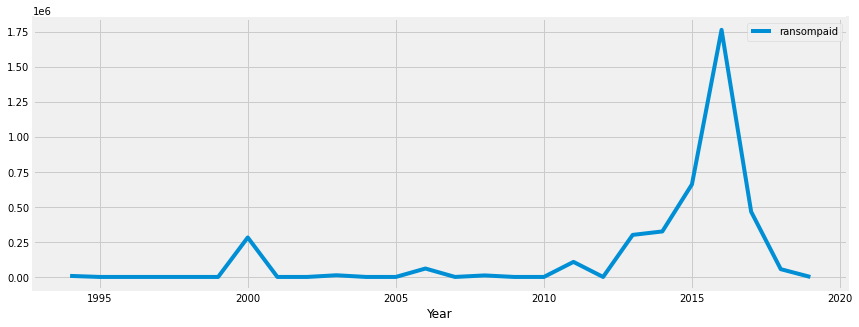

In [ ]:
plot4.plot(figsize=(13,5),x="Year")

In [ ]:
# HOSTAGE TABLE
asg_hostage = df_sea[(df_sea["AttackType"]=="Hostage")&(df_sea["Group"]=="Abu Sayyaf Group (ASG)")]

In [ ]:
asg_hostage.head(1)

,Year,Month,Day,Region,Country,Provstate,success,suicide,AttackType,TargetType,TargetNatlty,Group,Motive,Claimed,ClaimMode,WeaponType,multiple,Kill,Wound,nkillter,nwoundte,ishostkid,nvictims,ransom,ransomamt,ransompaid,hostkidoutcome,nreleased,Casualities
56509,1994,6,8,Southeast Asia,Philippines,Basilan,1,0,Hostage,Private Citizens & Property,NaN,Abu Sayyaf Group (ASG),NaN,nan,NaN,Firearms,0,16.000,0.000,0.000,0.000,1.000,74.000,1.000,"110,000.000","7,400.000",NaN,0.000,16.000


In [ ]:
t3 = asg_hostage[["TargetType"]].value_counts().reset_index()
t3.columns=["TargetType","Incidents"]
t3

,TargetType,Incidents
0,Private Citizens & Property,80
1,Business,35
2,Government (General),22
3,Maritime,18
4,Educational Institution,16
5,Journalists & Media,7
6,Tourists,6
7,Military,6
8,Police,5
9,NGO,4


In [ ]:
t4 = asg_hostage.groupby("TargetType")[["ransomamt","ransompaid","nvictims","nreleased","Kill","nkillter"]].sum().sort_values("ransompaid",ascending=False).reset_index()
t5 = pd.merge(t3,t4,how="inner",on="TargetType")
t5

,TargetType,Incidents,ransomamt,ransompaid,nvictims,nreleased,Kill,nkillter
0,Private Citizens & Property,80,"23,526,144.160","282,334.790",295.000,181.000,180.000,42.000
1,Business,35,"3,696,004.140","1,243,246.580",281.000,66.000,25.000,1.000
2,Government (General),22,"33,459,989.200","535,098.220",43.000,29.000,11.000,0.000
3,Maritime,18,"15,883,925.880","602,775.300",72.000,59.000,4.000,3.000
4,Educational Institution,16,"343,635.560","14,947.540",19.000,16.000,1.000,0.000
5,Journalists & Media,7,"1,398,572.000","260,100.000",28.000,23.000,0.000,0.000
6,Tourists,6,"43,145,520.000","26,000.000",51.000,30.000,6.000,0.000
7,Military,6,"22,180.660","22,180.660",7.000,3.000,4.000,0.000
8,Police,5,"3,144,674.450",0.000,11.000,6.000,1.000,0.000
9,NGO,4,0.000,0.000,8.000,4.000,0.000,0.000


In [ ]:
t5["ransomamtPerCase"] = t5["ransomamt"]/t5["Incidents"]
t5["ransompaidPerCase"] = t5["ransompaid"]/t5["Incidents"]
t5

,TargetType,Incidents,ransomamt,ransompaid,nvictims,nreleased,Kill,nkillter,ransomamtPerCase,ransompaidPerCase
0,Private Citizens & Property,80,"23,526,144.160","282,334.790",295.000,181.000,180.000,42.000,"294,076.802","3,529.185"
1,Business,35,"3,696,004.140","1,243,246.580",281.000,66.000,25.000,1.000,"105,600.118","35,521.331"
2,Government (General),22,"33,459,989.200","535,098.220",43.000,29.000,11.000,0.000,"1,520,908.600","24,322.646"
3,Maritime,18,"15,883,925.880","602,775.300",72.000,59.000,4.000,3.000,"882,440.327","33,487.517"
4,Educational Institution,16,"343,635.560","14,947.540",19.000,16.000,1.000,0.000,"21,477.222",934.221
5,Journalists & Media,7,"1,398,572.000","260,100.000",28.000,23.000,0.000,0.000,"199,796.000","37,157.143"
6,Tourists,6,"43,145,520.000","26,000.000",51.000,30.000,6.000,0.000,"7,190,920.000","4,333.333"
7,Military,6,"22,180.660","22,180.660",7.000,3.000,4.000,0.000,"3,696.777","3,696.777"
8,Police,5,"3,144,674.450",0.000,11.000,6.000,1.000,0.000,"628,934.890",0.000
9,NGO,4,0.000,0.000,8.000,4.000,0.000,0.000,0.000,0.000


In [ ]:
t6 = asg_hostage[["TargetNatlty"]].value_counts().reset_index()
t6.columns=["TargetNatlty","Incidents"]
t6

,TargetNatlty,Incidents
0,Philippines,144
1,Malaysia,14
2,Indonesia,10
3,China,8
4,United States,4
5,Multinational,3
6,Japan,3
7,Germany,3
8,International,1
9,Belgium,1


In [ ]:
t7 = asg_hostage.groupby("TargetNatlty")[["ransomamt","ransompaid","nvictims","nreleased","Kill","nkillter"]].sum().sort_values("ransompaid",ascending=False).reset_index()
t7

,TargetNatlty,ransomamt,ransompaid,nvictims,nreleased,Kill,nkillter
0,Malaysia,"16,056,995.300","1,229,652.400",44.000,36.000,12.000,0.000
1,Philippines,"15,523,707.600","687,854.730",567.000,291.000,197.000,46.000
2,Indonesia,"6,429,479.100","602,775.300",47.000,36.000,0.000,0.000
3,Germany,"5,839,075.000","255,600.000",13.000,13.000,0.000,0.000
4,Australia,"2,000,000.000","100,000.000",1.000,1.000,0.000,0.000
5,United States,"40,000,000.000","65,000.000",9.000,9.000,2.000,2.000
6,Multinational,"26,006,370.000","32,370.000",45.000,25.000,5.000,0.000
7,China,"12,527,398.050","6,030.660",13.000,12.000,0.000,0.000
8,France,0.000,0.000,3.000,3.000,0.000,0.000
9,International,0.000,0.000,2.000,2.000,0.000,0.000


In [ ]:
t8 = pd.merge(t6,t7,how="inner",on="TargetNatlty")
t8["ransomamtPerCase"] = t8["ransomamt"]/t8["Incidents"]
t8["ransompaidPerCase"] = t8["ransompaid"]/t8["Incidents"]
t8

,TargetNatlty,Incidents,ransomamt,ransompaid,nvictims,nreleased,Kill,nkillter,ransomamtPerCase,ransompaidPerCase
0,Philippines,144,"15,523,707.600","687,854.730",567.000,291.000,197.000,46.000,"107,803.525","4,776.769"
1,Malaysia,14,"16,056,995.300","1,229,652.400",44.000,36.000,12.000,0.000,"1,146,928.236","87,832.314"
2,Indonesia,10,"6,429,479.100","602,775.300",47.000,36.000,0.000,0.000,"642,947.910","60,277.530"
3,China,8,"12,527,398.050","6,030.660",13.000,12.000,0.000,0.000,"1,565,924.756",753.832
4,United States,4,"40,000,000.000","65,000.000",9.000,9.000,2.000,2.000,"10,000,000.000","16,250.000"
5,Multinational,3,"26,006,370.000","32,370.000",45.000,25.000,5.000,0.000,"8,668,790.000","10,790.000"
6,Japan,3,0.000,0.000,6.000,5.000,1.000,0.000,0.000,0.000
7,Germany,3,"5,839,075.000","255,600.000",13.000,13.000,0.000,0.000,"1,946,358.333","85,200.000"
8,International,1,0.000,0.000,2.000,2.000,0.000,0.000,0.000,0.000
9,Belgium,1,0.000,0.000,2.000,2.000,0.000,0.000,0.000,0.000


In [ ]:
t8.sort_values("ransompaidPerCase",ascending=False).reset_index(drop=True)

,TargetNatlty,Incidents,ransomamt,ransompaid,nvictims,nreleased,Kill,nkillter,ransomamtPerCase,ransompaidPerCase
0,Australia,1,"2,000,000.000","100,000.000",1.000,1.000,0.000,0.000,"2,000,000.000","100,000.000"
1,Malaysia,14,"16,056,995.300","1,229,652.400",44.000,36.000,12.000,0.000,"1,146,928.236","87,832.314"
2,Germany,3,"5,839,075.000","255,600.000",13.000,13.000,0.000,0.000,"1,946,358.333","85,200.000"
3,Indonesia,10,"6,429,479.100","602,775.300",47.000,36.000,0.000,0.000,"642,947.910","60,277.530"
4,United States,4,"40,000,000.000","65,000.000",9.000,9.000,2.000,2.000,"10,000,000.000","16,250.000"
5,Multinational,3,"26,006,370.000","32,370.000",45.000,25.000,5.000,0.000,"8,668,790.000","10,790.000"
6,Philippines,144,"15,523,707.600","687,854.730",567.000,291.000,197.000,46.000,"107,803.525","4,776.769"
7,China,8,"12,527,398.050","6,030.660",13.000,12.000,0.000,0.000,"1,565,924.756",753.832
8,Japan,3,0.000,0.000,6.000,5.000,1.000,0.000,0.000,0.000
9,International,1,0.000,0.000,2.000,2.000,0.000,0.000,0.000,0.000


In [ ]:
map_table = df_sea[df_sea["Group"]=="Abu Sayyaf Group (ASG)"].groupby("Provstate")["success"].size().reset_index()
map_table

,Provstate,success
0,Basilan,214
1,Bohol,2
2,Bukidnon,1
3,Cebu,2
4,Davao del Sur,4
5,Lanao del Sur,1
6,Maguindanao,4
7,Metropolitian Manila,4
8,North Cotabato,1
9,Palawan,2


In [ ]:
# Connect to Google Sheets
!pip install --upgrade oauth2client gspread

In [ ]:
# Mount to Google Sheets 
from google.colab import auth
auth.authenticate_user()

# Import neccessary libraries
import gspread
from oauth2client.client import GoogleCredentials
from gspread_dataframe import set_with_dataframe

In [ ]:
# Authorize Google Sheets API
gc = gspread.authorize(GoogleCredentials.get_application_default())

# Create a new Google Spreadsheets
sh = gc.create('Data_Terrorism')

In [ ]:
# ❗️ Note that before export data, you have to create the empty sheets in the Google Sheet first
def export_data(gsheet_key, worksheet_id, data):
    """gsheet_key (str): ID of Google Sheet File. (Key is the part behind /d/ and before /edit
                   For example: https://docs.google.com/spreadsheets/d/1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA/edit?usp=sharing
                   Key is 1WISuNUrWc-7BPO2s-pD3P3qqqgiLh0wRpvTNNtN21gA
       worksheet_id (int): 0, 1, 2, ... 
       data (DataFrame): data to write
    """
    sh = gc.open_by_key(gsheet_key)
    worksheet = sh.get_worksheet(worksheet_id)
    set_with_dataframe(worksheet, data)

In [ ]:
key = "1lJIj7oibdUsQrIRAODJ4yfG9OSvrIJ03Jz_tDK9VvyY"
export_data(key, 0, df_sea_new)
export_data(key, 1, table_2)
export_data(key, 2, table_3)
export_data(key, 3, table_4)
export_data(key, 4, table_5)
export_data(key, 5, ransom_philippines)
export_data(key, 6, plot1)
export_data(key, 7, plot2)
export_data(key, 8, plot3)
export_data(key, 9, plot4)
export_data(key, 10, t5)
export_data(key, 11, t8)
export_data(key, 12, map_table)
export_data(key, 13, df_vietnam)